## Model Training

In [24]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
import pickle

In [25]:

df = pd.read_csv('insurance_model.csv')
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,0,0.586957,1.0,0.368584,0.4,0.0,0.513224,0.538462,0.406839,1.0,0.150077,1.000000,8027.96800
1,1,1.000000,1.0,0.548457,0.0,0.0,0.609012,0.230769,0.519720,1.0,0.386486,1.000000,13822.80300
2,3,0.391304,1.0,0.374167,0.6,0.0,0.526346,0.307692,0.091385,1.0,0.213252,0.000000,6748.59120
3,4,0.021739,0.0,0.241588,0.2,0.0,0.148032,0.538462,0.471704,1.0,0.092163,0.333333,2709.24395
4,5,0.347826,1.0,0.539463,0.0,0.0,0.474412,0.115385,0.427502,1.0,0.161817,0.666667,3935.17990


In [27]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [28]:
X = df.drop(columns=['charges'],axis=1)

In [29]:
X.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region
0,0.586957,1.0,0.368584,0.4,0.0,0.513224,0.538462,0.406839,1.0,0.150077,1.000000
1,1.000000,1.0,0.548457,0.0,0.0,0.609012,0.230769,0.519720,1.0,0.386486,1.000000
2,0.391304,1.0,0.374167,0.6,0.0,0.526346,0.307692,0.091385,1.0,0.213252,0.000000
3,0.021739,0.0,0.241588,0.2,0.0,0.148032,0.538462,0.471704,1.0,0.092163,0.333333
4,0.347826,1.0,0.539463,0.0,0.0,0.474412,0.115385,0.427502,1.0,0.161817,0.666667


In [30]:
y = df['charges']
y

0       8027.96800
1      13822.80300
2       6748.59120
3       2709.24395
4       3935.17990
          ...     
921     9487.64420
922     5253.52400
923     5327.40025
924    19933.45800
925     4137.52270
Name: charges, Length: 926, dtype: float64

In [31]:
X.shape

(926, 11)

In [32]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((740, 11), (186, 11))

# Linear Regression

Mean Squared Error: 1781266.1915202385
R-squared: 0.9303867743655172


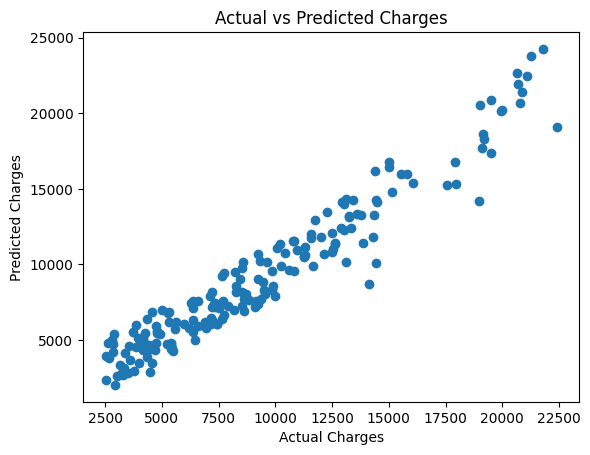

In [44]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()

# Ridge  Regression

In [45]:
# ridge
model1 = Ridge()
model1.fit(X_train, y_train)

# Prediction
y_pred = model1.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2_1 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2_1}')



Mean Squared Error: 1765342.6286388661
R-squared: 0.9310090792074565


# AdaBoost Regressor

In [46]:
# AdaBoost Regressor

model2 = AdaBoostRegressor()
model2.fit(X_train, y_train)

# Prediction
y_pred = model2.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2_2}')



Mean Squared Error: 774163.5321932861
R-squared: 0.969745105531608


# Decision Tree

In [47]:
# Decision Tree

model3 = DecisionTreeRegressor()
model3.fit(X_train, y_train)

# Prediction
y_pred = model3.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2_3 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2_3}')



Mean Squared Error: 501539.47282579093
R-squared: 0.9803994592988801


# CatBoosting Regressor

In [48]:
# CatBoosting Regressor

model4 = CatBoostRegressor()
model4.fit(X_train, y_train)

# Prediction
y_pred = model4.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2_4 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2_4}')



Learning rate set to 0.039041
0:	learn: 4761.8196156	total: 7.9ms	remaining: 7.89s
1:	learn: 4620.9310295	total: 40.5ms	remaining: 20.2s
2:	learn: 4475.0650273	total: 54.9ms	remaining: 18.2s
3:	learn: 4346.8131644	total: 61.1ms	remaining: 15.2s
4:	learn: 4222.6935071	total: 64.8ms	remaining: 12.9s
5:	learn: 4100.0866747	total: 68.4ms	remaining: 11.3s
6:	learn: 3973.1309182	total: 72.1ms	remaining: 10.2s
7:	learn: 3851.6453840	total: 75.8ms	remaining: 9.39s
8:	learn: 3737.1613369	total: 78.1ms	remaining: 8.6s
9:	learn: 3616.0976523	total: 80.4ms	remaining: 7.96s
10:	learn: 3511.7351665	total: 82.7ms	remaining: 7.43s
11:	learn: 3397.7073850	total: 85ms	remaining: 7s
12:	learn: 3298.5266177	total: 87.3ms	remaining: 6.63s
13:	learn: 3203.4012337	total: 92.1ms	remaining: 6.49s
14:	learn: 3108.1511748	total: 94.4ms	remaining: 6.2s
15:	learn: 3021.3414569	total: 96ms	remaining: 5.91s
16:	learn: 2942.9315100	total: 98.4ms	remaining: 5.69s
17:	learn: 2861.4042567	total: 101ms	remaining: 5.49s
1

# Random Forest Regressor

In [49]:
# Random Forest Regressor

model5 = RandomForestRegressor()
model5.fit(X_train, y_train)

# Prediction
y_pred = model5.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2_5 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2_5}')



Mean Squared Error: 290465.1006522503
R-squared: 0.9886484048892261


# XGBRegressor

Mean Squared Error: 187857.26007688057
R-squared: 0.992658396653424


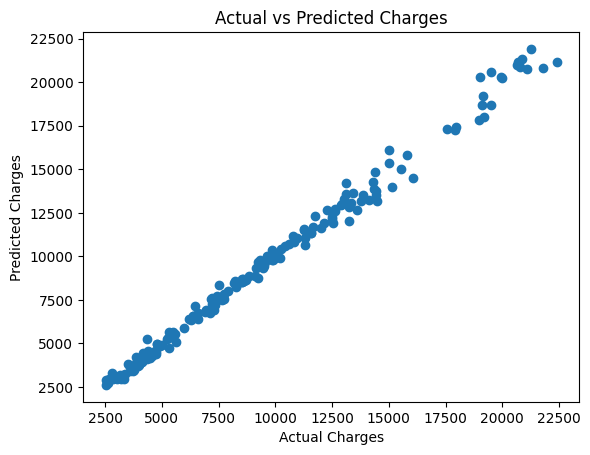

In [50]:
# XGBRegressor

model6 = XGBRegressor()
model6.fit(X_train, y_train)

# Prediction
y_pred = model6.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2_6 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2_6}')

# Plotting actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.show()

In [51]:
model_list = ['Linear Regression', 'Ridge Regression', 'AdaBoost Regressor','Decision Tree','CatBoosting Regressor','Random Forest Regressor','XGBRegressor']
r2_list = [r2,r2_1,r2_2,r2_3,r2_4,r2_5,r2_6]

pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,XGBRegressor,0.992658
5,Random Forest Regressor,0.988648
4,CatBoosting Regressor,0.981072
3,Decision Tree,0.980399
2,AdaBoost Regressor,0.969745
1,Ridge Regression,0.931009
0,Linear Regression,0.930387


In [52]:
Pkl_Filename = "Health_xgb.pkl"
pickle.dump(model6, open(Pkl_Filename, 'wb'))

In [53]:
with open(Pkl_Filename, 'rb') as file:
    Pickled_XGB_Model = pickle.load(file)

Pickled_XGB_Model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [54]:
score = Pickled_XGB_Model.score(X_test, y_test)
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))

# Predict the Labels using the reloaded Model
Ypredict = Pickled_XGB_Model.predict(X_test)

Ypredict

Test score: 99.27 %


array([ 2963.548 , 12163.689 , 12253.929 , 13503.897 ,  4451.672 ,
        8338.633 , 12016.629 ,  2975.653 ,  5902.0327,  8644.231 ,
       11911.793 ,  9379.473 ,  7738.619 , 13524.784 ,  2727.4429,
        4536.2495,  3268.4543,  4709.344 ,  2927.1328,  8748.306 ,
        4978.6035, 18674.734 ,  8704.663 ,  9307.816 ,  7181.324 ,
        9773.856 ,  4019.7522,  6939.8735,  7466.9688,  4205.265 ,
        9676.136 ,  7495.4985, 13041.475 ,  4424.347 ,  4062.7236,
       11689.898 ,  8865.045 , 20584.684 ,  6766.6934, 20871.154 ,
        3792.194 , 10838.045 , 10726.686 ,  4554.2285, 11318.6875,
        4923.865 , 10617.585 , 15374.99  , 13587.542 , 20762.512 ,
        7838.0317,  6790.5215,  3067.3767,  5638.558 ,  4975.0884,
       11940.36  ,  3434.028 ,  5547.5396, 13175.237 , 11046.321 ,
       13146.398 ,  9887.103 , 12734.656 ,  2918.1409,  8484.547 ,
        2938.707 , 10016.178 , 21359.89  , 10637.927 ,  6479.288 ,
        6587.696 , 12689.861 , 21159.523 , 11082.463 , 20799.8